In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Time Spent in European Congestion 
[Makeover Monday Week 20](https://data.world/makeovermonday/2018w20-hours-spent-in-congestion-in-european-cities/discuss/2018-w20-hours-spent-in-congestion-in-european-cities/112510#122214) is where the majority of data was pulled from. Density information was taken from wikipedia entries of the city. 

The graph to be worked on has a few small issues that stood out to me. Both from the perspective of what I am supposed to learn from this information. The construction of the graph also has some small issues.  ![](https://media.data.world/IWvgW8w9SbSoXkWKxYcv_Screen%20Shot%202018-05-12%20at%2010.18.56%20pm.png) The visual is also available as an interactive graphic at [Which Europeans Spend the Most Time in Traffic](http://www.euronews.com/2018/02/07/which-european-commuters-spend-the-most-time-in-traffic-jams-)

The immediate things to fix are:
* Remove the many axis lines.
* Simplify the presentation
* Move from horizontal presentation of nominal data to horizontal
* Convert from hours spent to more insightful metric

In [3]:
euro_cities = pd.read_csv('./data/hoursspentincongestion.csv')
euro_cities['congestion_by_density'] = (euro_cities['hours_spent_in_congestion'] / 
                                        (euro_cities['density_km2'] /  1000)
                                        ).map(lambda x: round(x, 1))

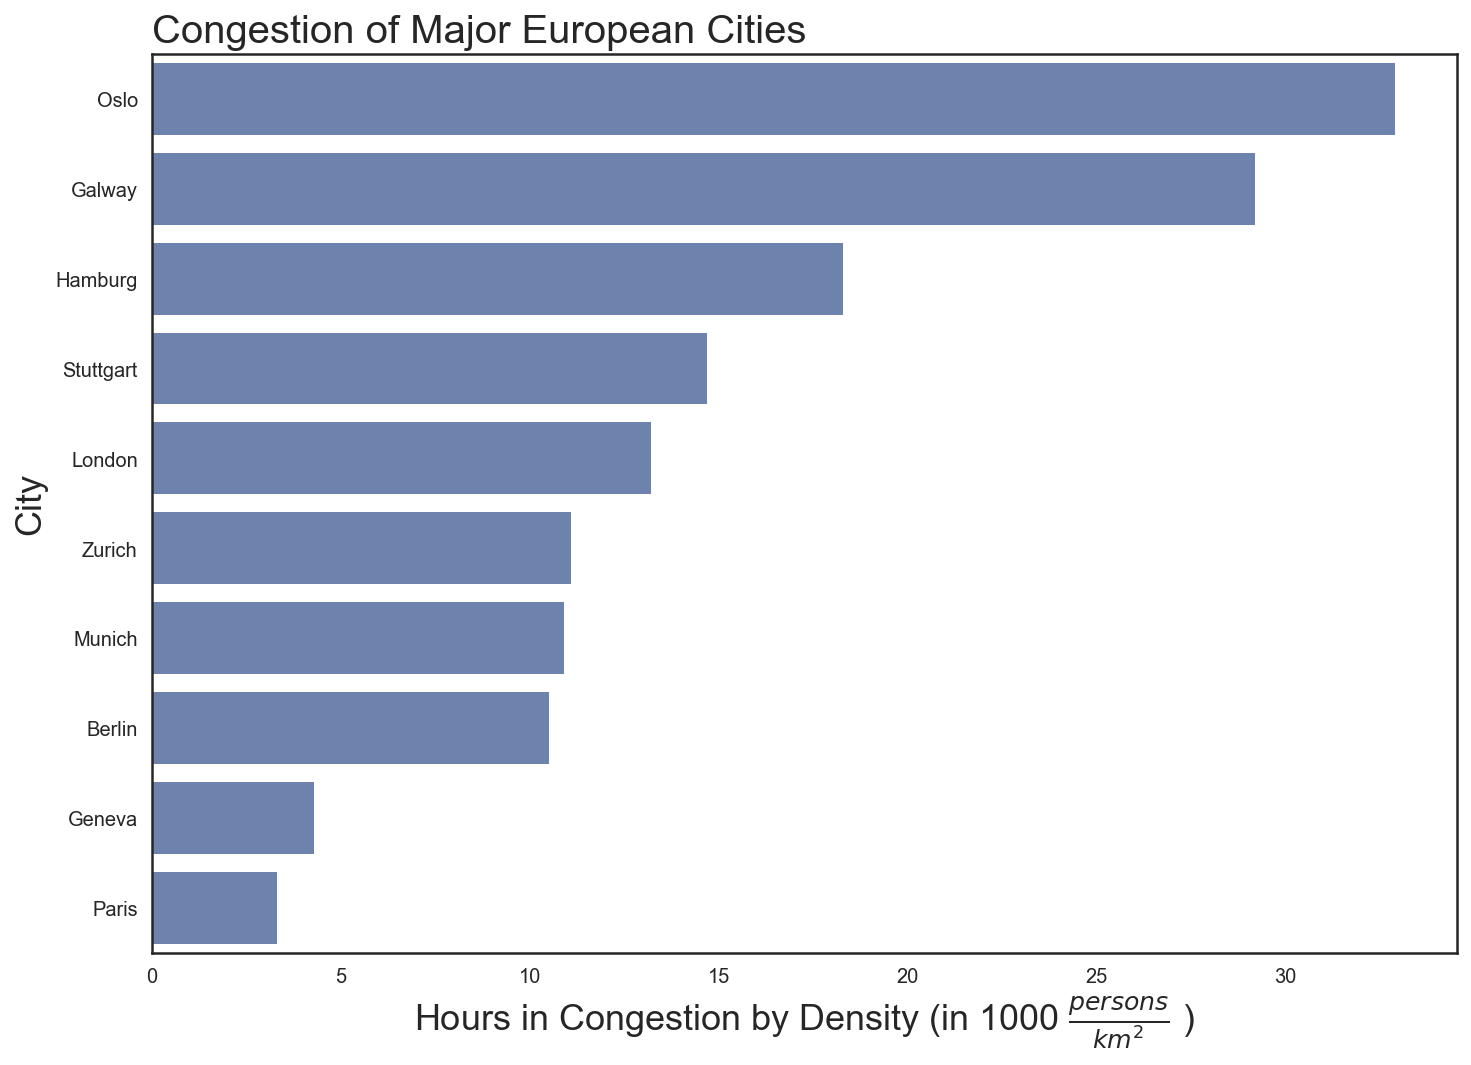

In [4]:
euro_cities = euro_cities.sort_values(by='congestion_by_density', ascending = False)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
euro_congestion = sns.barplot( x=euro_cities['congestion_by_density'],y=euro_cities['city'], color='#637eb6')
# euro_congestion.set_xticklabels(labels=euro_cities['city'],rotation=90)


plt.title('Congestion of Major European Cities', loc='left', fontsize=20)
plt.xlabel(r'Hours in Congestion by Density (in 1000 $\frac{persons}{km^2}$ )', fontsize='18')
plt.ylabel('City', fontsize='18')
plt.show()

### Explanation of Changes
The title of the graph was longer than it needed to be, so I shortened it down. The additional information could be given in the paragraph preceding the image. Removing the axis lines makes the graph cleaner, along with having white be the background instead of the beige-gray. 
Only major change to the data was to modify the time spent in traffic to be a function of density instead of being only the hours traveled.

With more citizens in an urban situation it would be expected that they would load the infrastructure to the breaking point. These cities would also be incentivized to have a robust transit infrastructure that allows for alternatives other than driving. This would mean that less dense cities would be liklier to spend more time in traffic as a function of population, seen below in a sorted table by density.

In [6]:
euro_cities.sort_values(by='density_km2')

,country,city,hours_spent_in_congestion,year,density_km2,congestion_by_density
5,Norway,Oslo,46,2017,1400,32.9
9,Ireland,Galway,44,2017,1508,29.2
6,Germany,Hamburg,44,2017,2400,18.3
8,Germany,Stuttgart,44,2017,3000,14.7
7,Germany,Berlin,44,2017,4200,10.5
3,Switzerland,Zurich,51,2017,4600,11.1
4,Germany,Munich,51,2017,4700,10.9
0,United Kingdom,London,74,2017,5590,13.2
2,Switzerland,Geneva,52,2017,12000,4.3
1,France,Paris,69,2017,21000,3.3
